In [120]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import stats
import scipy
from statsmodels.sandbox.stats.multicomp import multipletests

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/admin/anaconda3/envs/data/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
data = pd.read_csv('ab_browser_test.csv')

In [4]:
data

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30
...,...,...,...,...,...,...
566129,603133,Browser #14,control,1,2,1
566130,603134,Browser #2,exp,4,2,0
566131,603135,Browser #4,control,0,1,1
566132,603136,Browser #4,control,2,3,1


In [11]:
(sum(data[data.slot == 'exp'].n_clicks) - sum(data[data.slot == 'control'].n_clicks)) / \
sum(data[data.slot == 'control'].n_clicks) * 100

1.6135689824415809

In [22]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [13]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [24]:
exp = list(map(np.median, get_bootstrap_samples(data[data.slot == 'exp'].n_clicks.values, 1000)))
con = list(map(np.median, get_bootstrap_samples(data[data.slot == 'control'].n_clicks.values, 1000)))

In [32]:
stat_intervals(np.array(con) - np.array(exp), 0.05)

array([-1., -1.])

In [34]:
sexp = list(map(np.mean, get_bootstrap_samples(data[data.slot == 'exp'].n_clicks.values, 1000)))
scon = list(map(np.mean, get_bootstrap_samples(data[data.slot == 'control'].n_clicks.values, 1000)))

In [35]:
stat_intervals(np.array(scon) - np.array(sexp), 0.05)

array([-0.40555733, -0.19936073])

In [40]:
np.random.seed(0)
samp = get_bootstrap_samples(data[data.slot == 'control'].n_clicks.values, 500)

In [41]:
means = list(map(np.mean, samp))

In [46]:
otc = []
for i in tqdm(range(len(samp))):
    otc.append(sum([(el-means[i])**2 for el in samp[i]]))

100%|██████████| 500/500 [04:55<00:00,  1.69it/s]


((array([496.00790142, 496.28984073, 496.44837459, 496.56078615,
         496.64886689, 496.72177909, 496.78427733, 496.83915848,
         496.88821233, 496.93265597, 496.97335597, 497.01095206,
         497.04593046, 497.07866967, 497.10947035, 497.13857541,
         497.16618407, 497.1924618 , 497.2175476 , 497.24155939,
         497.26459814, 497.28675096, 497.30809357, 497.3286922 ,
         497.34860517, 497.36788405, 497.38657472, 497.40471817,
         497.42235117, 497.43950686, 497.45621519, 497.47250333,
         497.48839601, 497.50391582, 497.51908341, 497.53391776,
         497.54843633, 497.56265521, 497.57658929, 497.59025236,
         497.60365721, 497.61681574, 497.62973905, 497.64243747,
         497.65492068, 497.66719774, 497.67927713, 497.69116683,
         497.70287433, 497.71440669, 497.72577056, 497.73697222,
         497.74801761, 497.75891232, 497.76966169, 497.78027074,
         497.79074426, 497.80108678, 497.81130262, 497.82139589,
         497.8313705 , 49

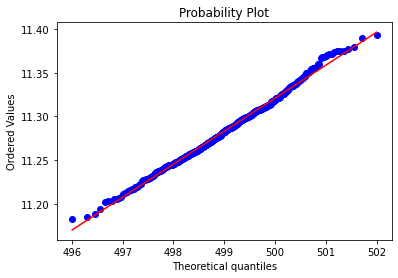

In [50]:
scipy.stats.probplot(means, dist="norm", 
                     sparams=len(samp)-1, plot=plt)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

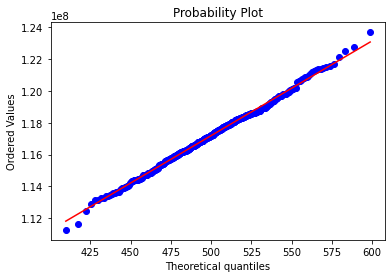

In [51]:
scipy.stats.probplot(otc, dist="chi2", 
                     sparams=len(samp)-1, plot=plt)

In [57]:
len(data[data.slot == 'exp'].userID.unique())

281450

In [72]:
clicks = []
a = data[data.slot == 'exp'].userID.unique()
for i in tqdm(a):
    clicks.append(sum(data[data.userID == i].n_clicks))

100%|██████████| 281450/281450 [02:20<00:00, 2007.11it/s]


In [73]:
df1 = pd.DataFrame({'id' : data[data.slot == 'exp'].userID.unique(), 'clicks': clicks})
df1

,id,clicks
0,1,23
1,3,3
2,5,29
3,7,54
4,9,6
...,...,...
281445,603129,0
281446,603130,0
281447,603131,4
281448,603134,4


In [77]:
clicks = []
a = data[data.slot == 'control'].userID.unique()
for i in tqdm(a):
    clicks.append(sum(data[data.userID == i].n_clicks))

100%|██████████| 284392/284392 [02:22<00:00, 1991.23it/s]


In [78]:
df2 = pd.DataFrame({'id' : data[data.slot == 'control'].userID.unique(), 'clicks': clicks})
df2

,id,clicks
0,6,12
1,8,4
2,10,22
3,15,2
4,23,3
...,...,...
284387,603128,5
284388,603132,1
284389,603133,1
284390,603135,0


In [79]:
stats.mannwhitneyu(df1.clicks, df2.clicks)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [89]:
data.browser.unique()

array(['Browser #2', 'Browser #4', 'Browser #14', 'Browser #17',
       'Browser #20', 'Browser #22'], dtype=object)

In [112]:
sp = []
for i in data.browser.unique():
    s1 = data.query('slot == "control" & browser == @i').n_clicks
    s2 = data.query('slot == "exp" & browser == @i').n_clicks
    sp.append(stats.mannwhitneyu(s1, s2))

In [117]:
p = [i[1] for i in sp]

In [125]:
multipletests(p, alpha = 0.025, method = 'holm')

(array([False, False,  True, False, False, False]),
 array([0.1362193 , 0.81521235, 0.        , 0.14960241, 0.81521235,
        0.77221655]),
 0.0042107445144894395,
 0.004166666666666667)

In [129]:
z = []
for i in data.browser.unique():
    s1 = data.query('slot == "control" & browser == @i').n_nonclk_queries.sum() / \
    data.query('slot == "control" & browser == @i').n_queries.sum() * 100
    
    s2 = data.query('slot == "exp" & browser == @i').n_nonclk_queries.sum() / \
    data.query('slot == "exp" & browser == @i').n_queries.sum() * 100
    
    z.append([s1, s2])

In [130]:
z

[[45.96274717919465, 44.982746948554706],
 [46.97092963514274, 45.14294190358467],
 [57.59041136008114, 43.755617361273295],
 [36.29936674628208, 36.93741284866483],
 [40.540484743383296, 38.97737648371716],
 [40.593976593513354, 39.85394721969546]]